# Convolutional neural network

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

# data preprocessing in the training set only to avoid overfitting

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


# Preprocess the test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 706 images belonging to 2 classes.


# Part 2 building the CNN

## Initialize the CNN

In [5]:
cnn=tf.keras.Sequential()

## Step one Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

## Step 2 pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

## Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

## Step 3 flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

## Step 4 - Full connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

## step 5 - Output layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Part 3 - Training the CNN

## Compiling the CNN    (same than compiling the ann)

In [13]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training the CNN  on the training set and evaluate on the test set

In [14]:
cnn.fit(x=training_set,validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 59s 223ms/step - loss: 0.6611 - accuracy: 0.6019 - val_loss: 0.6788 - val_accuracy: 0.5496
Epoch 2/25
250/250 [==============================] - 64s 258ms/step - loss: 0.5981 - accuracy: 0.6876 - val_loss: 0.3142 - val_accuracy: 0.9150
Epoch 3/25
250/250 [==============================] - 69s 277ms/step - loss: 0.5442 - accuracy: 0.7204 - val_loss: 0.4185 - val_accuracy: 0.7989
Epoch 4/25
250/250 [==============================] - 68s 273ms/step - loss: 0.5066 - accuracy: 0.7471 - val_loss: 0.2604 - val_accuracy: 0.9178
Epoch 5/25
250/250 [==============================] - 63s 254ms/step - loss: 0.4886 - accuracy: 0.7607 - val_loss: 0.4617 - val_accuracy: 0.7847
Epoch 6/25
250/250 [==============================] - 64s 258ms/step - loss: 0.4654 - accuracy: 0.7731 - val_loss: 0.7020 - val_accuracy: 0.6204
Epoch 7/25
250/250 [==============================] - 64s 256ms/step - loss: 0.4462 - accuracy: 0.7894 - val_loss: 0.6978 - val_ac

## Evaluate the model

In [32]:
evaluation_res=cnn.evaluate(test_set)
print("Test Loss:", evaluation_res[0])
print("Test Accuracy:", evaluation_res[1])


23/23 [==============================] - 2s 97ms/step - loss: 0.4856 - accuracy: 0.8272
Test Loss: 0.48558005690574646
Test Accuracy: 0.8271954655647278


## Making a single prediction

In [21]:
#here we verify how the model has been trained, the result shows that 1 is dog and 0 is cat
training_set.class_indices

{'cats': 0, 'dogs': 1}

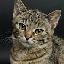

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('dataset/cat_test_image.jpg', target_size=(64,64))
test_image

In [23]:
test_image=image.img_to_array(test_image)
test_image

array([[[ 44.,  45.,  47.],
        [ 45.,  46.,  48.],
        [ 45.,  46.,  48.],
        ...,
        [ 46.,  57.,  53.],
        [ 46.,  57.,  53.],
        [ 46.,  57.,  53.]],

       [[ 43.,  44.,  46.],
        [ 44.,  45.,  47.],
        [ 45.,  46.,  48.],
        ...,
        [ 45.,  56.,  52.],
        [ 45.,  56.,  52.],
        [ 45.,  56.,  52.]],

       [[ 42.,  43.,  45.],
        [ 43.,  44.,  46.],
        [ 44.,  45.,  47.],
        ...,
        [ 44.,  55.,  51.],
        [ 44.,  55.,  51.],
        [ 44.,  55.,  51.]],

       ...,

       [[ 23.,  24.,  26.],
        [ 23.,  24.,  26.],
        [ 23.,  24.,  26.],
        ...,
        [145., 133., 107.],
        [126., 111.,  88.],
        [136., 121.,  98.]],

       [[ 17.,  18.,  20.],
        [ 17.,  18.,  20.],
        [ 17.,  18.,  20.],
        ...,
        [126., 110.,  85.],
        [105.,  93.,  69.],
        [116., 104.,  80.]],

       [[ 14.,  15.,  17.],
        [ 14.,  15.,  17.],
        [ 14.,  

In [24]:
test_image=np.expand_dims(test_image,axis=0)

result=cnn.predict(test_image)
if result[0][0]==1:      # you can skip to code[0][0] and it would work just the same
    prediction='dog'
else:
    prediction='cat'
    
prediction

1/1 [==============================] - 0s 30ms/step


'cat'